# Jupyter workflow

> The classic Jake Vanderplas 'Jupyter Data Science Workflow', remastered using `nbdev`.

In [1]:
#| default_exp jupyter_workflow

In [2]:
#| hide
from nbdev.showdoc import *

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
#| export
import os
from urllib.request import urlretrieve

import pandas as pd
import numpy as np

## Workflow

In [1]:
FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [5]:
from urllib.request import urlretrieve

In [10]:
urlretrieve(FREMONT_URL, filename="Fremont.csv")

('Fremont.csv', <http.client.HTTPMessage at 0x1105e16c0>)

In [11]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
08/01/2022 12:00:00 AM,23,7,16
08/01/2022 01:00:00 AM,12,5,7
08/01/2022 02:00:00 AM,3,0,3
08/01/2022 03:00:00 AM,5,2,3
08/01/2022 04:00:00 AM,10,2,8
08/01/2022 05:00:00 AM,27,5,22
08/01/2022 06:00:00 AM,100,43,57
08/01/2022 07:00:00 AM,219,90,129
08/01/2022 08:00:00 AM,335,143,192


In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("Fremont.csv")

In [14]:
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,08/01/2022 12:00:00 AM,23.0,7.0,16.0
1,08/01/2022 01:00:00 AM,12.0,5.0,7.0
2,08/01/2022 02:00:00 AM,3.0,0.0,3.0
3,08/01/2022 03:00:00 AM,5.0,2.0,3.0
4,08/01/2022 04:00:00 AM,10.0,2.0,8.0


In [21]:
data = pd.read_csv("Fremont.csv", index_col="Date")
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
08/01/2022 12:00:00 AM,23.0,7.0,16.0
08/01/2022 01:00:00 AM,12.0,5.0,7.0
08/01/2022 02:00:00 AM,3.0,0.0,3.0
08/01/2022 03:00:00 AM,5.0,2.0,3.0
08/01/2022 04:00:00 AM,10.0,2.0,8.0


In [23]:
data.index

Index(['08/01/2022 12:00:00 AM', '08/01/2022 01:00:00 AM',
       '08/01/2022 02:00:00 AM', '08/01/2022 03:00:00 AM',
       '08/01/2022 04:00:00 AM', '08/01/2022 05:00:00 AM',
       '08/01/2022 06:00:00 AM', '08/01/2022 07:00:00 AM',
       '08/01/2022 08:00:00 AM', '08/01/2022 09:00:00 AM',
       ...
       '01/31/2023 02:00:00 PM', '01/31/2023 03:00:00 PM',
       '01/31/2023 04:00:00 PM', '01/31/2023 05:00:00 PM',
       '01/31/2023 06:00:00 PM', '01/31/2023 07:00:00 PM',
       '01/31/2023 08:00:00 PM', '01/31/2023 09:00:00 PM',
       '01/31/2023 10:00:00 PM', '01/31/2023 11:00:00 PM'],
      dtype='object', name='Date', length=90552)

In [24]:
data = pd.read_csv("Fremont.csv", index_col="Date", parse_dates=True)

In [25]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [26]:
data.index

DatetimeIndex(['2022-08-01 00:00:00', '2022-08-01 01:00:00',
               '2022-08-01 02:00:00', '2022-08-01 03:00:00',
               '2022-08-01 04:00:00', '2022-08-01 05:00:00',
               '2022-08-01 06:00:00', '2022-08-01 07:00:00',
               '2022-08-01 08:00:00', '2022-08-01 09:00:00',
               ...
               '2023-01-31 14:00:00', '2023-01-31 15:00:00',
               '2023-01-31 16:00:00', '2023-01-31 17:00:00',
               '2023-01-31 18:00:00', '2023-01-31 19:00:00',
               '2023-01-31 20:00:00', '2023-01-31 21:00:00',
               '2023-01-31 22:00:00', '2023-01-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=90552, freq=None)

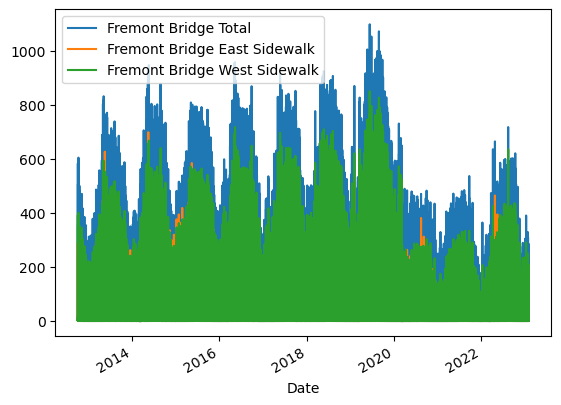

In [32]:
data.plot();

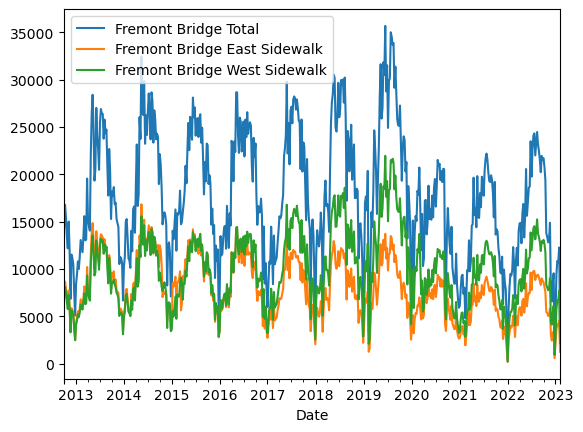

In [34]:
data.resample('W').sum().plot();

In [35]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

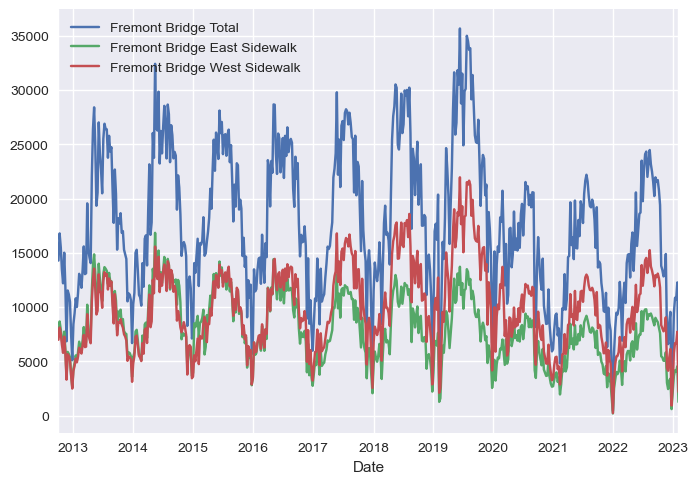

In [36]:
data.resample('W').sum().plot();

In [37]:
data.columns=['Total', 'East', 'West']

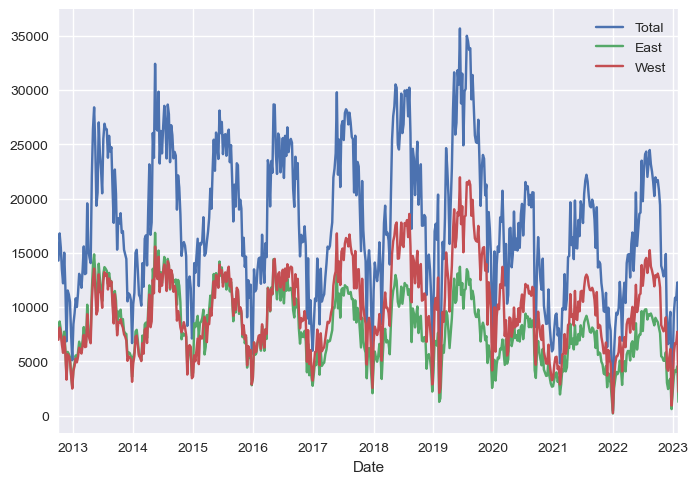

In [38]:
data.resample('W').sum().plot();

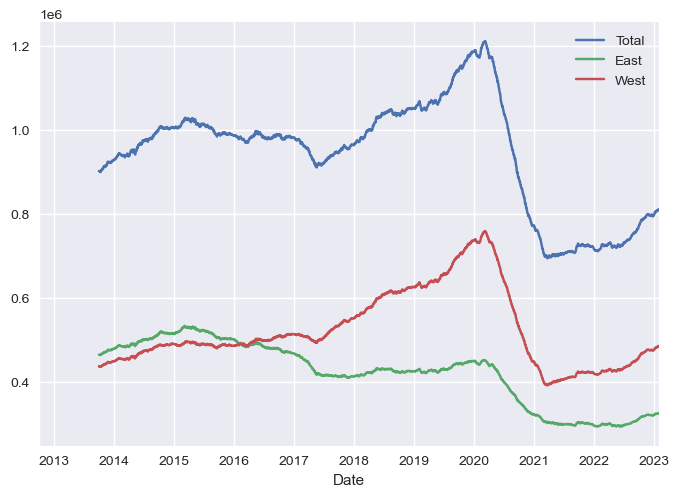

In [41]:
data.resample('D').sum().rolling(365).sum().plot();

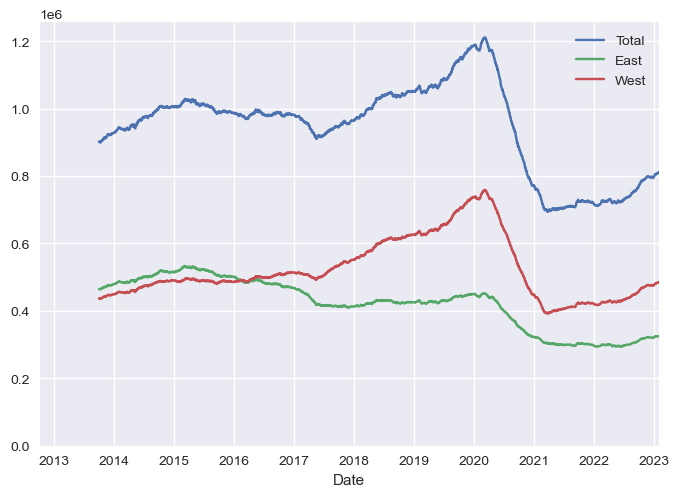

In [43]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

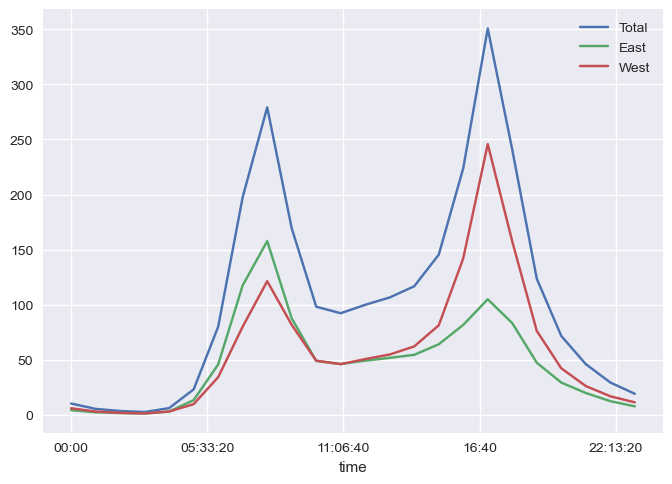

In [45]:
data.groupby(data.index.time).mean().plot();

In [47]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

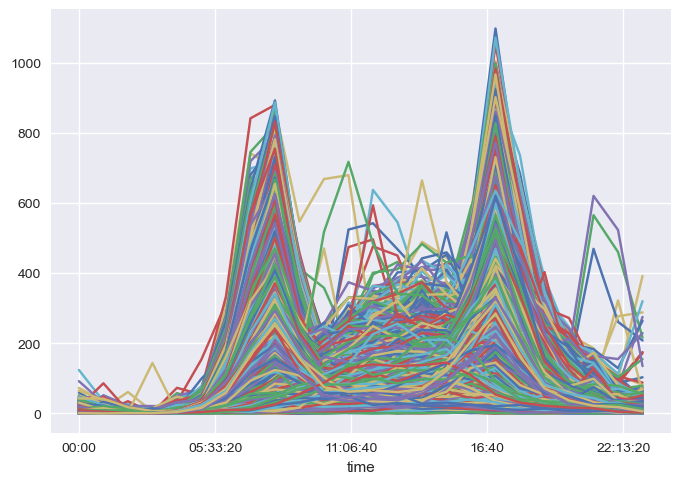

In [48]:
pivoted.plot(legend=False)

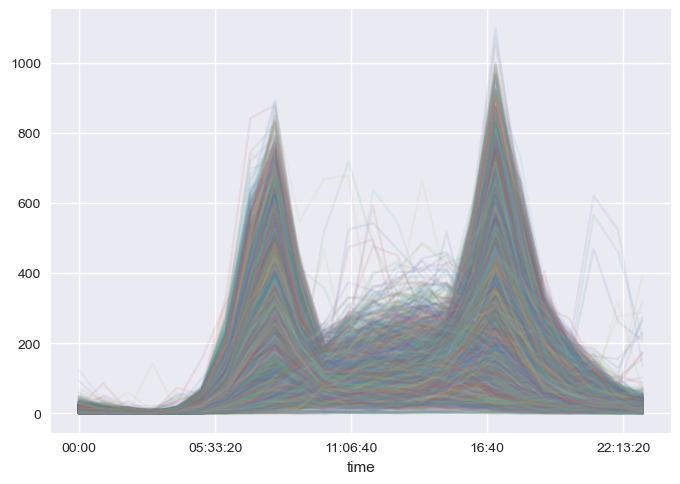

In [49]:
pivoted.plot(legend=False, alpha=0.1);

restart and run all
git commit

In [55]:
# build get_fremont_data
from pathlib import Path
def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL):
    if not Path(filename).exists():
        urlretrieve(url, filenmae)
    data = pd.read_csv(filename, index_col='Date', parse_dates=True)
    data.columns = ['Total', 'East', 'West']
    return data

In [56]:
data = get_fremont_data()

In [57]:
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


move imports, clen notebook, restart and run all, git commit

In [6]:
#| export
def get_fremont_data(filename='Fremont.csv', url=FREMONT_URL,
                     force_download=False):
    """Download and cache the fremont data
    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data
    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data
    """
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv(filename, index_col='Date')

    try:
        data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
    except TypeError:
        data.index = pd.to_datetime(data.index)

    data.columns = ['Total', 'East', 'West']
    data['Total'] = data['West'] + data['East']
    return data

In [ ]:
get_fremont_data()

In [7]:
def test_fremont_data():
    data = get_fremont_data()
    assert all(data.columns == ['Total', 'East', 'West'])
    assert isinstance(data.index, pd.DatetimeIndex)
    assert len(np.unique(data.index.time) == 24)

In [8]:
test_fremont_data()

In [9]:
np.arange(4)

array([0, 1, 2, 3])

In [10]:
!head Fremont.csv

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
08/01/2022 12:00:00 AM,23,7,16
08/01/2022 01:00:00 AM,12,5,7
08/01/2022 02:00:00 AM,3,0,3
08/01/2022 03:00:00 AM,5,2,3
08/01/2022 04:00:00 AM,10,2,8
08/01/2022 05:00:00 AM,27,5,22
08/01/2022 06:00:00 AM,100,43,57
08/01/2022 07:00:00 AM,219,90,129
08/01/2022 08:00:00 AM,335,143,192


In [ ]:
data = pd.read_csv('Fremont.csv', index_col='Date')
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
08/01/2022 12:00:00 AM,23.0,7.0,16.0
08/01/2022 01:00:00 AM,12.0,5.0,7.0
08/01/2022 02:00:00 AM,3.0,0.0,3.0
08/01/2022 03:00:00 AM,5.0,2.0,3.0
08/01/2022 04:00:00 AM,10.0,2.0,8.0


In [ ]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2022-08-01 00:00:00', '2022-08-01 01:00:00',
               '2022-08-01 02:00:00', '2022-08-01 03:00:00',
               '2022-08-01 04:00:00', '2022-08-01 05:00:00',
               '2022-08-01 06:00:00', '2022-08-01 07:00:00',
               '2022-08-01 08:00:00', '2022-08-01 09:00:00',
               ...
               '2022-09-30 14:00:00', '2022-09-30 15:00:00',
               '2022-09-30 16:00:00', '2022-09-30 17:00:00',
               '2022-09-30 18:00:00', '2022-09-30 19:00:00',
               '2022-09-30 20:00:00', '2022-09-30 21:00:00',
               '2022-09-30 22:00:00', '2022-09-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=87600, freq=None)

In [ ]:
data.columns

Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

In [ ]:
data = get_fremont_data()
data.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


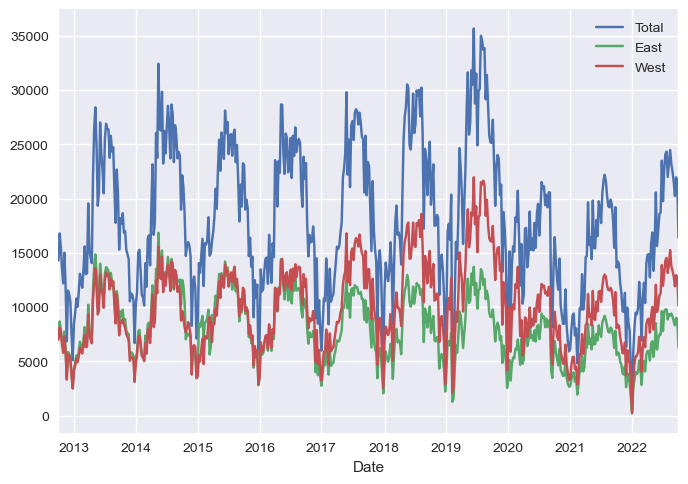

In [ ]:
data.resample('W').sum().plot();

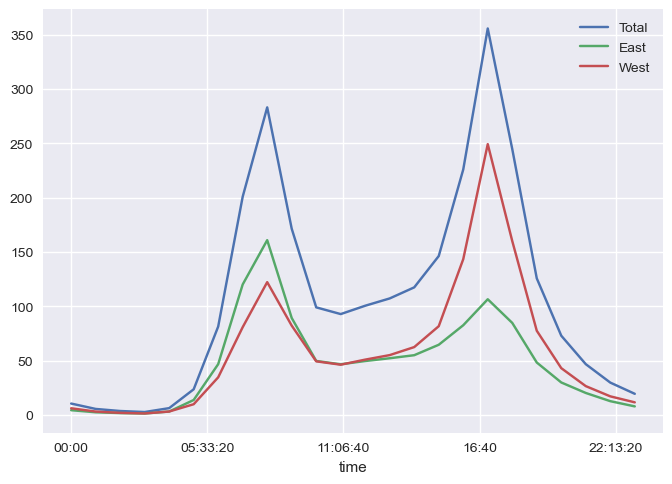

In [ ]:
data.groupby(data.index.time).mean().plot();

In [ ]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


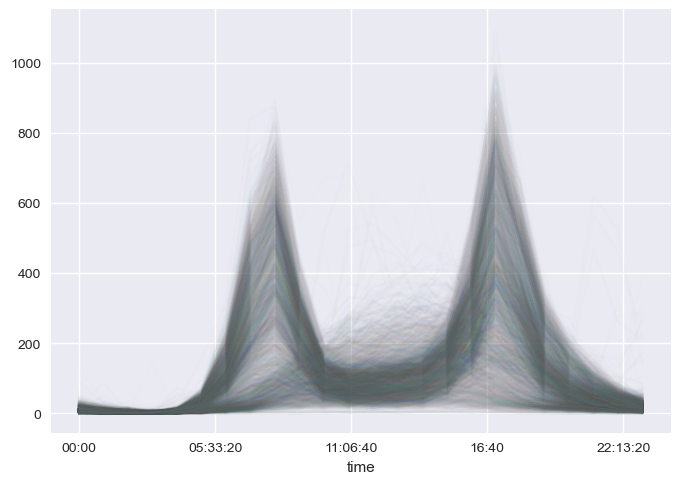

In [ ]:
pivoted.plot(legend=False, alpha=0.01);

In [ ]:
#| export
def say_hello(to):
    "Say hello to somebody"
    return f'Hello {to}!'

In [ ]:
say_hello("Isaac")

'Hello Isaac!'

In [ ]:
assert say_hello("Hamel")=="Hello Hamel!"

In [ ]:
from fastcore.test import *

In [ ]:
test_eq(say_hello("Hamel"), "Hello Hamel!")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()